In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

Your Name and PRN:
- Name: Agrim Jain
- PRN : 250840128004
- Date : 12-11-25

# Deep Neural Networks
## Assignment 02


## Take Single Layer Model and add Sigmoid activation function

In [5]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score  # Import function to calculate various metrics
from sklearn.datasets import make_moons # Import function to create non-linear data
from tqdm import tqdm # Import function for progress bar

In [ ]:
###----------------
### Some parameters
###----------------

# Directory locations
# inpDir = '../input/' # Set path of input directory as per your system  - not needed
# outDir = '../output' # Set path of output directory as per your system

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2 # noise added 
EPOCHS = 200  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000 # number of samples
TEST_SIZE = 0.2 # test size as fraction of whole data

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [6]:
# creating data and splitting data into features and labels
X, y = make_moons(n_samples=N_SAMPLES, shuffle=True, noise=NOISE, random_state=RANDOM_STATE)

In [7]:
# shape of X and y
X.shape, y.shape

((1000, 2), (1000,))

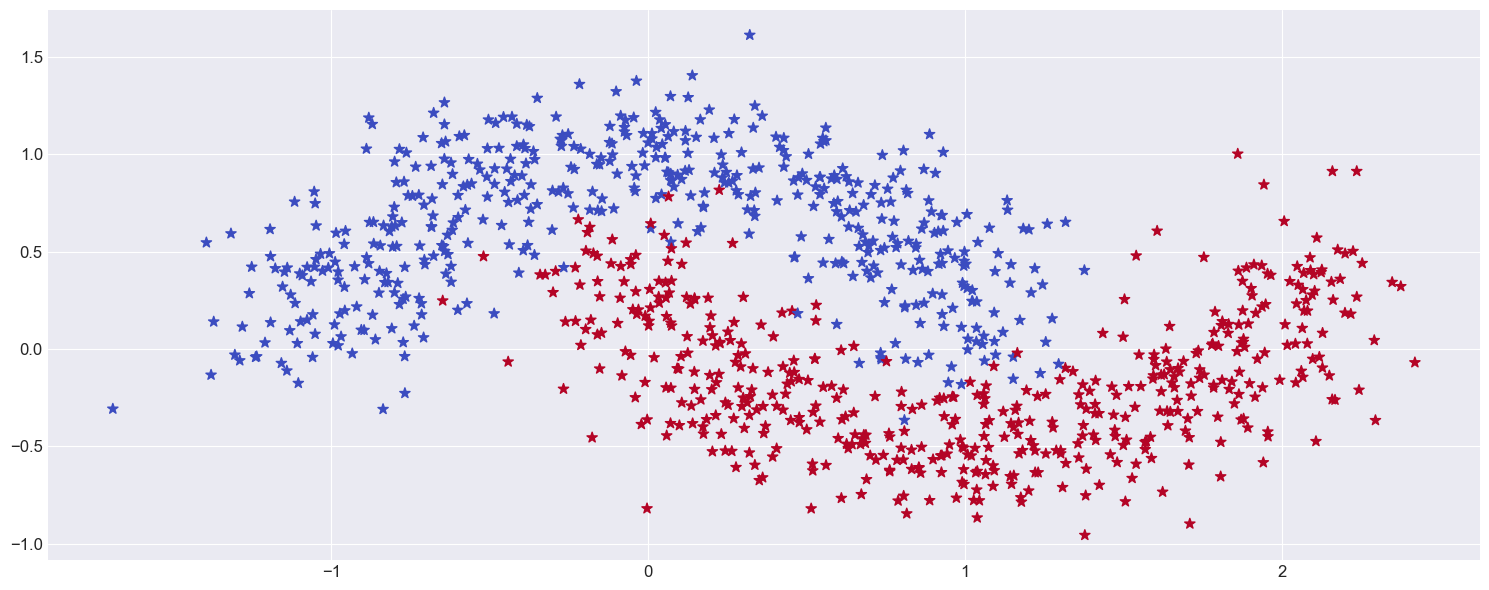

In [17]:
# Plotting data
plt.scatter(X[:, 0], X[:, 1], s=60, c=y, marker='*', cmap=CMAP)
plt.tight_layout()
plt.show()

In [19]:
# Converting data to dataframe
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head() # displaying first 5 rows of the data

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [21]:
# splitting data into train and test sets
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
data_train.shape, data_test.shape # shape of train and test sets

((900, 3), (100, 3))

In [22]:
# sigmoid function
def fn_sigmoid(z: np.ndarray) -> float:
     return 1 / (1 + np.exp(-z))

In [23]:
# predict function that takes a sample and uses sigmoid function to predict
def predict(row, weights):
    z = weights[0] 
    for i in range(len(row) - 1):
        z +=  weights[i+1] * row[i]    # aggregation : w*x + b

    return fn_sigmoid(z)

In [24]:
# function to train model (i.e. finding weights and biases)

def train_weights(train, alpha, n_epoch):

    error = [] # to track error
    weights = rng.random(train.shape[1])  # initialize weights at random
    m = train.shape[0] # number of rows

    for epoch in tqdm(range(n_epoch)):  # looping for number of epochs
        sum_error = 0   # to collect error for this epoch 
        for row in train:  # looping through all rows in one epoch
            a = predict(row, weights)  # getting prediction for the row   -------> FORWARD PROPAGATION

            # ---------> BACKPROPAGATION STARTS <---------

            dz = a - row[-1]  # calculating slope of loss wrt z = (a - y)     
            err =  - row[-1] * np.log(a) - (1- row[-1])*np.log(1-a)       # Binary error
            sum_error +=  err  # adding errors for each row - using mean squared error as loss

            weights[0] = weights[0] - alpha * dz   # updating bias
            for i in range(len(row) - 1):
                weights[i+1] = weights[i+1] - alpha * dz * row[i]    # updating weights       

            # ---------> BACKPROPAGATION ENDS <-----------

        error.append(sum_error/m)  # average error
        
    return error, weights


In [25]:
# training model
error, weights = train_weights(train=data_train, alpha=ALPHA, n_epoch=EPOCHS)
print(weights) # printing weights

100%|██████████| 200/200 [00:01<00:00, 109.75it/s]

[ 0.04591915  1.21769965 -5.00295521]


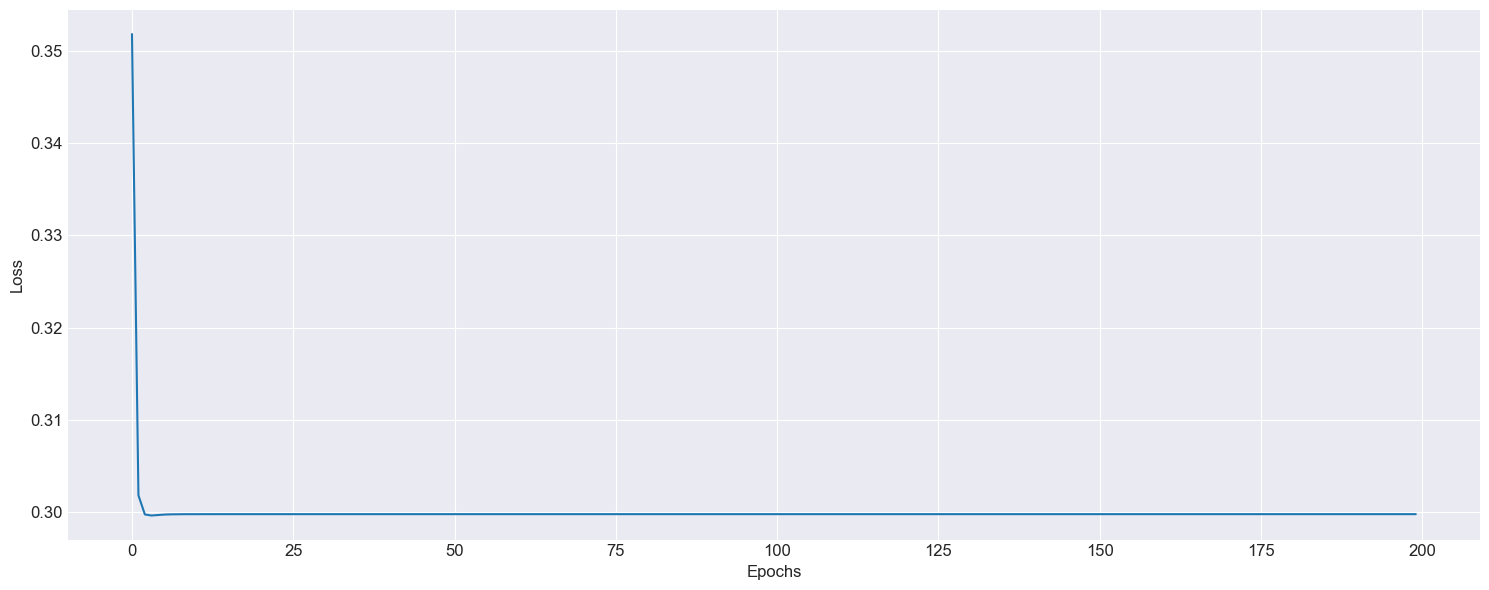

In [27]:
# average error per epoch plot
fig, ax = plt.subplots()
ax.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

In [29]:
# Function to plot decision boundary
def fn_plot_decision_boundary():
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01 # cells that we want to fill with colors
    padding = 2 * dm # margin
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    X_plot = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    X_plot = np.hstack((X_plot, np.ones((X_plot.shape[0], 1))))  # adding a third column with any values just to match 
                                                                    # the shape of our original data according to which we wrote earlier code

    # List to collect predictions for each point in the mesh grid
    y_pred = []

    for row in (X_plot):    # looping over meshgrid points
        # Make prediction
        a = predict(row,weights) # activation of each sample
        y_p = 0  # setting default prediction class to 0
        if a>= 0.5: y_p=1   # updating prediction class to 1 if activation is above a threshold (0.5)

        y_pred.append(y_p) # appending predictions to the list
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

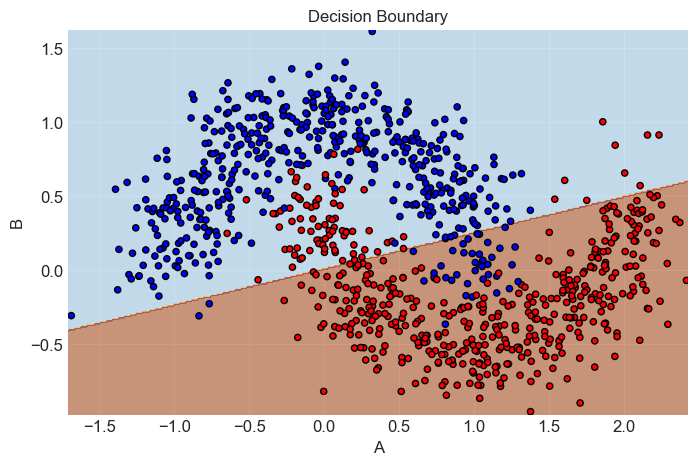

In [32]:
# Plotting decision boundary
fn_plot_decision_boundary()